![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

# Data Cleaning with Pandas - Project Two

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

We are going to continue using the dataset of 5,000 movies scraped from IMDB. It contains information on the actors, directors, budget, and gross amount earned, as well as the IMDB rating and release year.

We are going to dive a little deeper and use some more libraries as well as the Pandas methods for cleaning data.

You are free to explore the data as much as you like, add as many cells as you wish.

We will have some checkpoints along the way asking you to build functions that will help you clean the data. These functions will be tested when you submit the project.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('movies.csv')

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Function 1

Create a function `what_types` that accepts a `dataframe` and returns a Series displaying the data types and how many columns per type are in the dataset.

In [ ]:
def what_types(dataframe):
    return dataframe.get_dtype_counts()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Function 2

Create a function `change_type` that accepts a `column` and `type` that returns a Series that has been converted to the passed type, first dropping NaN values before returning.

In [ ]:
def change_type(column, type=int):
    return column.dropna().astype(type)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Function 3

Create a function `column_median_boolean` that accepts a `column` returning a boolean Series, True if the value is greater than the columns median value and False if it is less than the median. 

In [ ]:
def column_median_boolean(column):
    return column > column.median()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Function 4

Create a function `convert_to_datetime` that accepts a `column` and a `string` returning a Series that has dropped all NaN values, is first converted to a string data type, the value that was passed as the `string` argument to be added to all of the values. Finally a datetime Series should be returned. 

*Try to test this with the _title_year_ column, add '0101' to each value and return as a datetime object.*

In [ ]:
def convert_to_datetime(column, string):
    return pd.to_datetime(column.dropna().astype(str) + string)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Function 5

Create a function `new_column` that accepts a `column` and `separator` splitting that column by the given separator, expanding the split and only returning the first instance of the split in the returned Series for all of the rows. 

*Test this by passing the _genres_ column, separate by | and returning a Series of only the first instance of the genre value per row, assign this to a new column if you want.*

In [13]:
def new_column(column, separator):
    return column.str.split(separator, expand=True).loc[:,0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Function 6

Create a function `column_contains` that accepts a `column` and `con` returning the sum of occurences of `con` within the passed `column`

In [16]:
def column_contains(column, con):
    return column.str.contains(con).sum()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Visualization 1

Explore the `imdb_score` column:

- Show a distribution plot.
- Show a box plot.

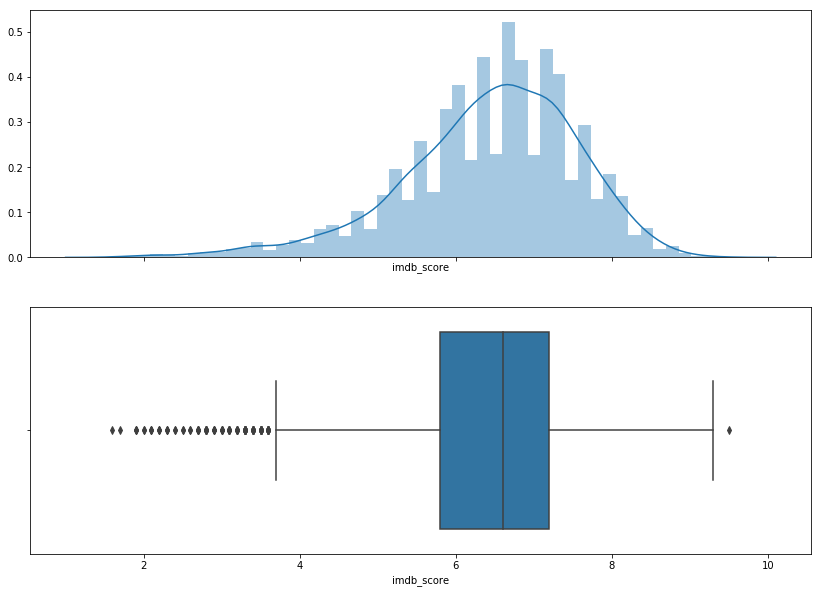

In [20]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14,10))

sns.distplot(df['imdb_score'], ax=axs[0])
sns.boxplot(df['imdb_score'], ax=axs[1])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Visualization 2

Explore the `gross` column:

- Show a distribution plot.
- Show a box plot.

*Drop all NaN values before you plot*

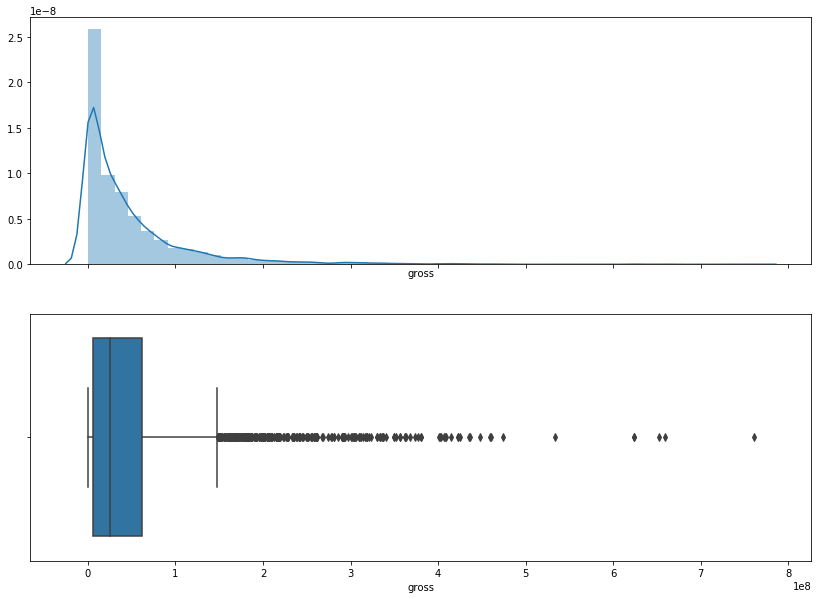

In [23]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14,10))

sns.distplot(df['gross'].dropna(), ax=axs[0])
sns.boxplot(df['gross'].dropna(), ax=axs[1])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Visualization 3

Explore the `imdb_score` vs `duration` relationship. Can you find any insight?

- Show a reg plot

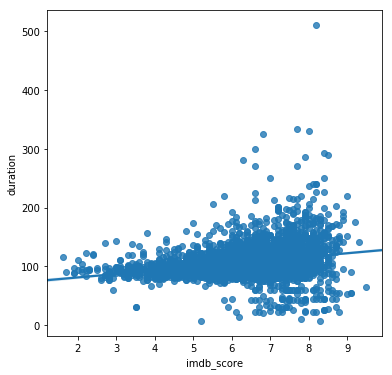

In [31]:
plt.figure(figsize=(6,6))

sns.regplot('imdb_score', 'duration', data=df)